# Scrip to draw evolution of stochastic model 

Charge the files.

In [1]:
# Setting the terminal postscript with the options
import csv
import os
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import math as m
from glob import glob
import seaborn as sns

###### Stochastic files data, save in name the names of the files with the information
output_files_tag = 'a'
foldername = 'OutputValuesPopulation'+output_files_tag+'/'

name=[]
for i in range(0,10):
    for file in os.listdir(foldername):
        if file[:5]=="Out%s."%i:
#             print file
            name.append(file)
for i in range(10,100):
    for file in os.listdir(foldername):
        if file[:6]=="Out%s."%i:
#             print file
            name.append(file)
for file in os.listdir(foldername):
        if file[:7]=="Out%s."%100:
#             print file
            name.append(file)
            


In [2]:
###### Stochastic files data
output_files_tag = 'a'
foldername = 'OutputValuesPopulation'+output_files_tag+'/'

Pop_stoc6={}
Pop_stoc_realization = {}
for file in name:
    #print file
    j=21
    foldername='%s/'%j+'OutputValuesPopulation'+output_files_tag+'/'
    aux=[]
    crs = open(foldername+file, "r")
    for columns in ( raw.strip().split() for raw in crs ):
        aux.append(columns[0])
    aux=np.array(aux)
    aux=aux.astype(float)
    Pop_stoc6[file]=aux
    for j in range(22,24):
        foldername='%s/'%j+'OutputValuesPopulation'+output_files_tag+'/'
        aux=[]
        crs = open(foldername+file, "r")
        for columns in ( raw.strip().split() for raw in crs ):
            aux.append(columns[0])
        aux=np.array(aux)
        aux=aux.astype(float)
        Pop_stoc6[file]=aux+Pop_stoc6[file]
    Pop_stoc_realization = Pop_stoc6
    Pop_stoc6[file]=Pop_stoc6[file]/3.0
        


In [3]:
Pop_stoc6_ox={}          
for file in name:
    #print file
    j=21
    foldername='%s/'%j+'OutputValuesOxygen'+output_files_tag+'/'
    aux=[]
    crs = open(foldername+file, "r")
    for columns in ( raw.strip().split() for raw in crs ):
        aux.append(columns[0])
    aux=np.array(aux)
    aux=aux.astype(float)
    Pop_stoc6_ox[file]=aux
    for j in range(22,24):
        foldername='%s/'%j+'OutputValuesOxygen'+output_files_tag+'/'
        aux=[]
        crs = open(foldername+file, "r")
        for columns in ( raw.strip().split() for raw in crs ):
            aux.append(columns[0])
        aux=np.array(aux)
        aux=aux.astype(float)
        Pop_stoc6_ox[file]=aux+Pop_stoc6_ox[file]
    Pop_stoc6_ox[file]=Pop_stoc6_ox[file]/3.0

FileNotFoundError: [Errno 2] No such file or directory: '21/OutputValuesOxygena/Out1.txt'

In [4]:
output_files_tag_cg = '1box_dt_1_CFL_ok'
foldername = '../OutputValuesPopulation'+output_files_tag_cg+'/'
Pop_cg={}
for file in name:
    #print file
    aux=[]
    crs = open(foldername+file, "r")
    for columns in ( raw.strip().split() for raw in crs ):
        aux.append(columns[0])
    aux=np.array(aux)
    aux=aux.astype(float)
    Pop_cg[file]=aux


FileNotFoundError: [Errno 2] No such file or directory: '../OutputValuesPopulation1box_dt_1_CFL_ok/Out0.txt'

In [5]:
import matplotlib.colors as mcolors
# Crear un colormap de Matplotlib. Por ejemplo, 'viridis', que es un buen colormap por defecto.
# Definir un mapa de colores
cmap = sns.color_palette("magma", as_cmap=True)
cmap2 = sns.color_palette("viridis", as_cmap=True)
 # Puedes elegir cualquier mapa de colores disponible

# Normalizar los índices de 'name' para usar con el mapa de colores
norm = mcolors.Normalize(vmin=0, vmax=len(name)-1)

fig = plt.figure()
for i, m in enumerate(name[10:len(name):10]):
    Pop_time = np.array(Pop_stoc6[m])

    x = np.array(range(0, len(Pop_time)))
    
    # Seleccionar color del mapa de colores
    color = cmap(norm(i))
    color_cg = cmap2(norm(i))
    Pop_time_cg = np.array(Pop_cg[m])
    if i == 0:
      plt.plot(Pop_time, '-', color=color, label="Stochastic")
      plt.plot(Pop_time_cg, '--', color=color, label= "CG")
      plt.plot(Pop_stoc_realization[m], '*',  color=color,label="Stochastic one realization")
    else:
      plt.plot(Pop_time, '-', color=color)
      plt.plot(Pop_time_cg, '--', color=color)
      plt.plot(Pop_stoc_realization[m], '*',  color=color)
    plt.xlabel('space (X)', fontsize=15)
    plt.ylabel(r'Population', fontsize=15)
    # plt.xlim(0, 10)
   # plt.ylim(0, 10000)
    plt.legend()
# Crear una barra de colores basada en el mapa de colores utilizado
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
sm2 = plt.cm.ScalarMappable(cmap=cmap2, norm=norm)
sm2.set_array([])
# Ajustar los ticks para que aparezcan cada 10
tick_locations = np.arange(0, len(name), 10)
tick_labels = [name[i] for i in tick_locations]  # Opcional: si quieres mostrar nombres específicos en los ticks

plt.colorbar(sm, ticks=tick_locations, 
             boundaries=np.arange(-0.5, len(name), 1), 
             format='%d', label='Time Index')
#plt.colorbar(sm2, ticks=tick_locations, 
 #            boundaries=np.arange(-0.5, len(name), 1), 
  #           format='%d', label='Index de cg')

plt.show()

KeyError: 'Out10.txt'

<Figure size 640x480 with 0 Axes>

C:\Users\guill\AppData\Local\Temp\ipykernel_14372\466974913.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig=plt.figure()


1

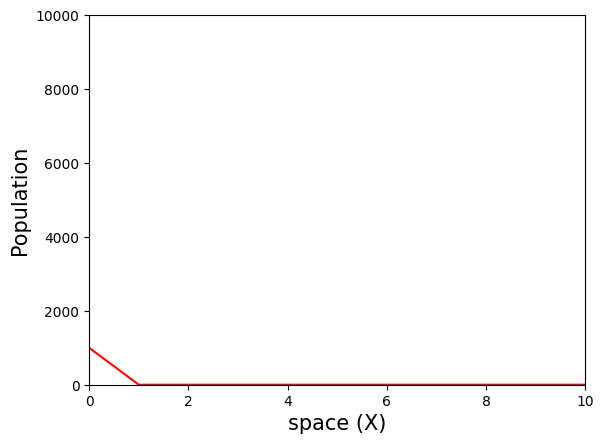

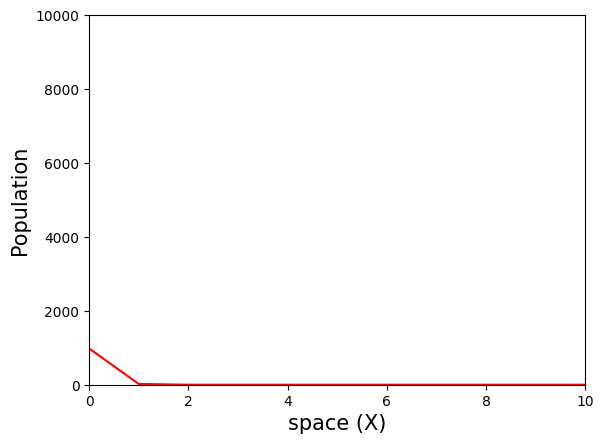

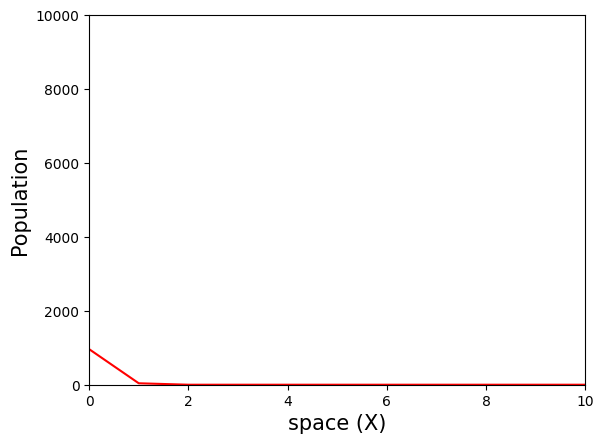

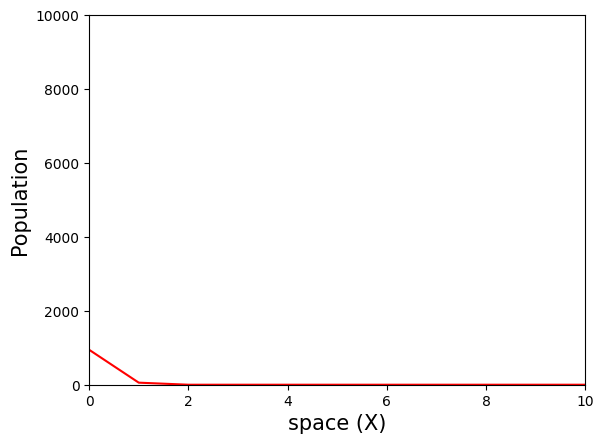

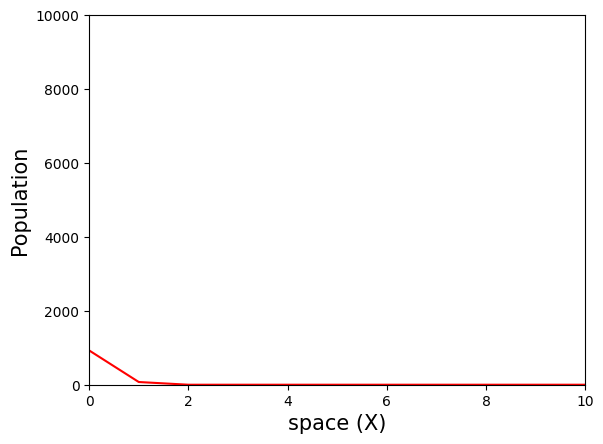

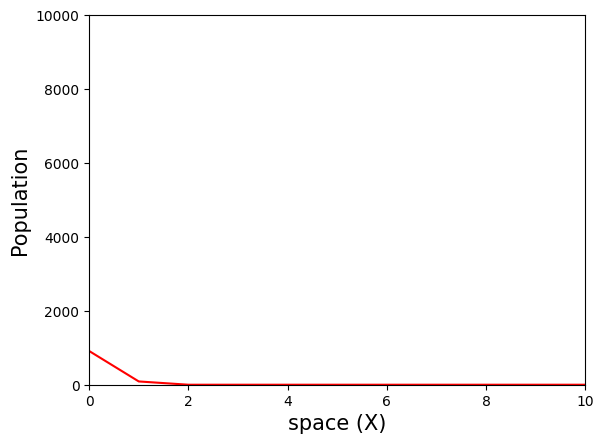

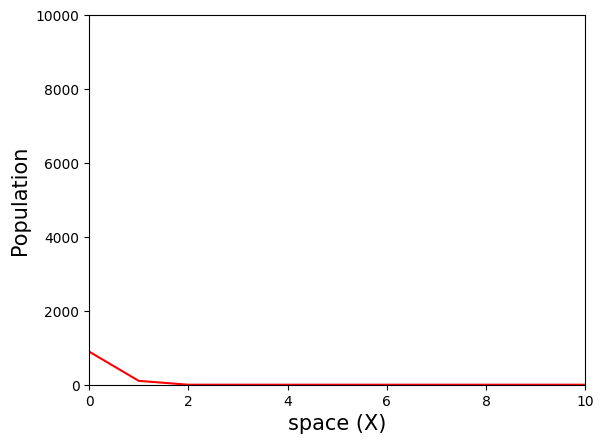

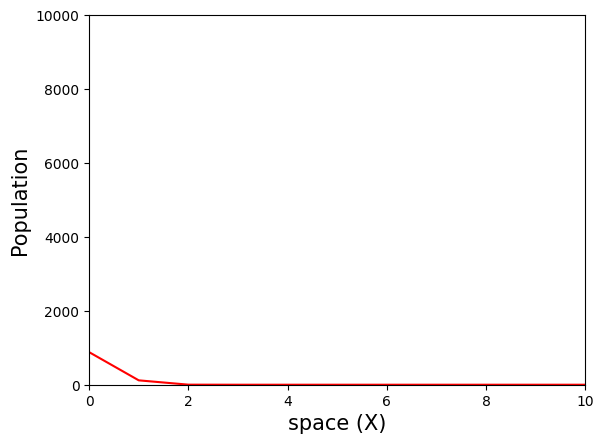

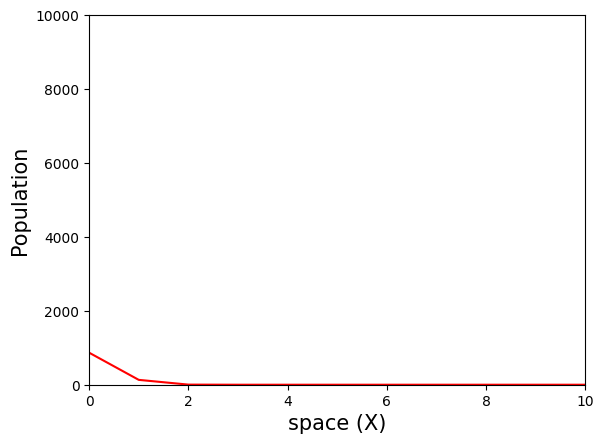

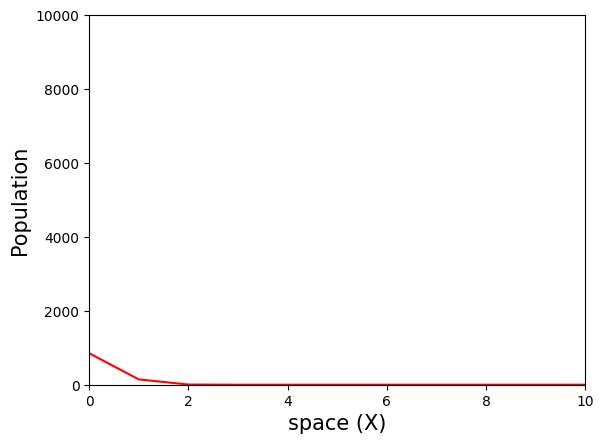

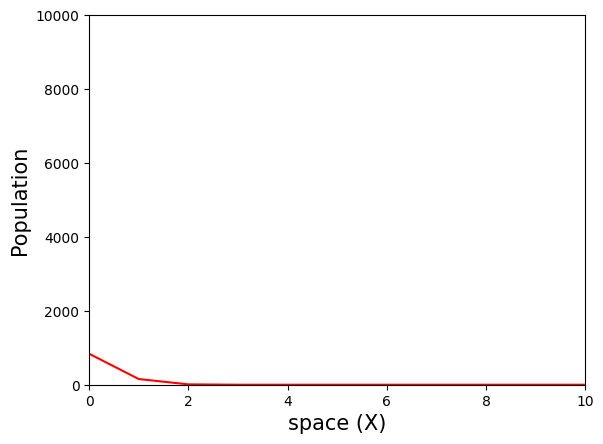

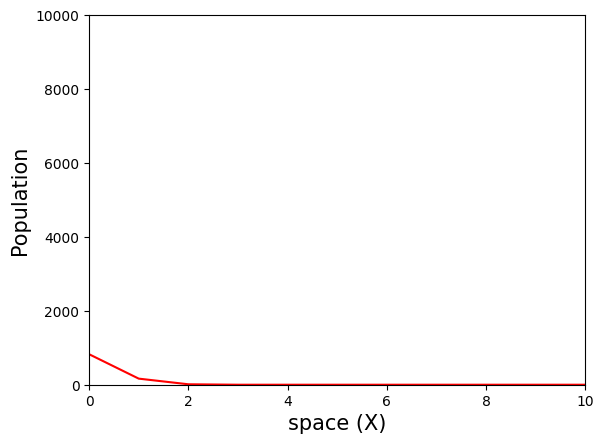

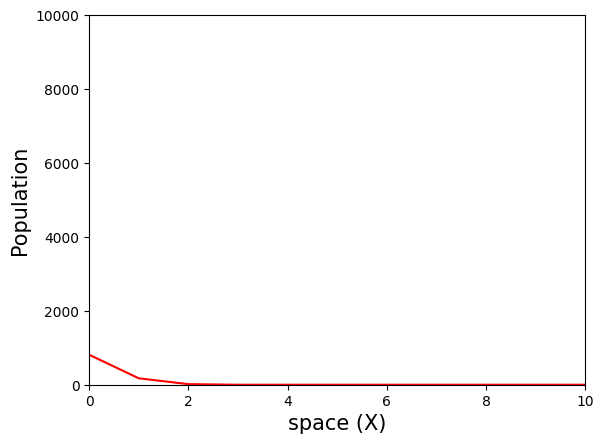

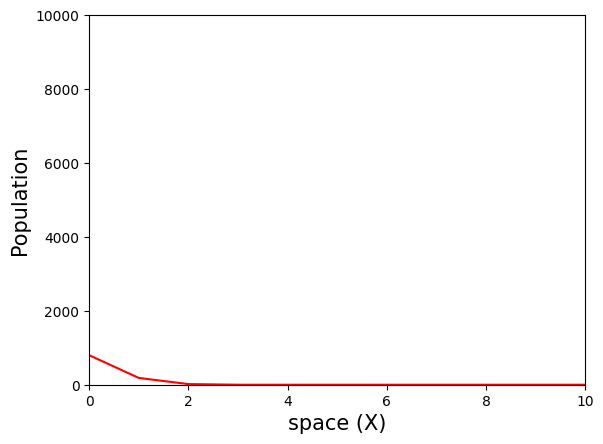

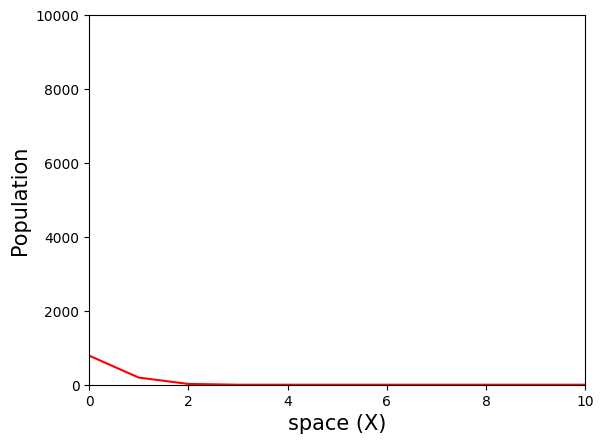

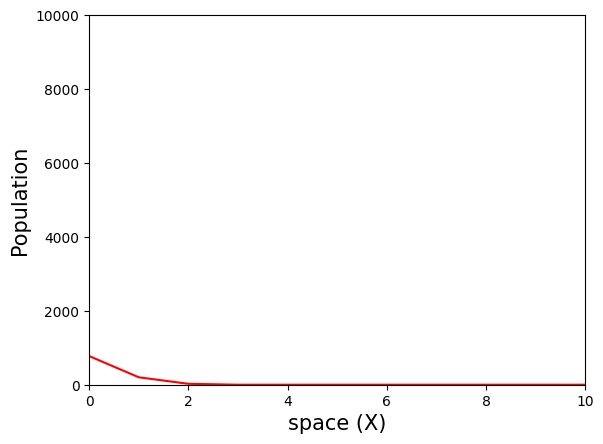

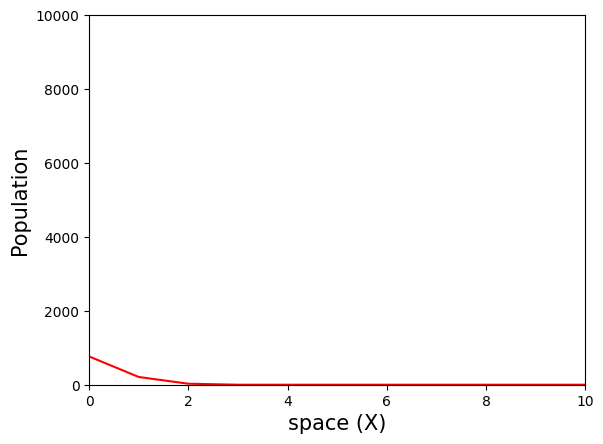

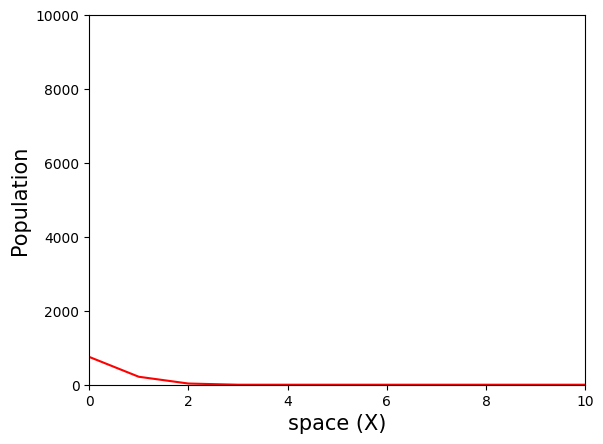

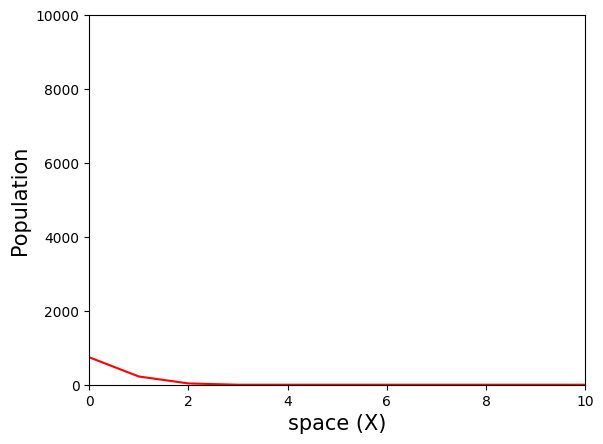

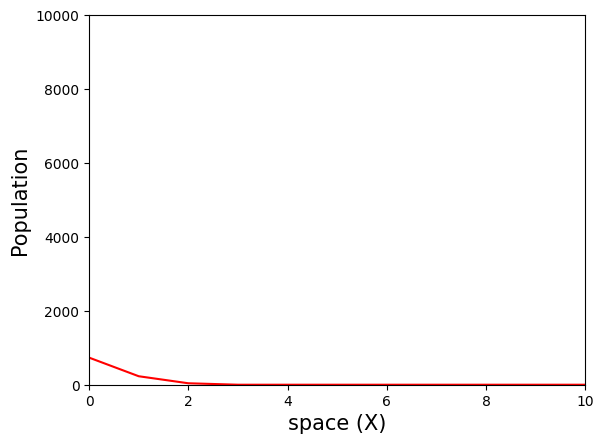

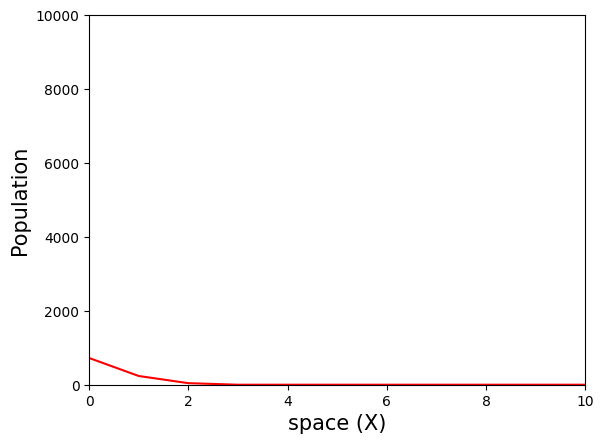

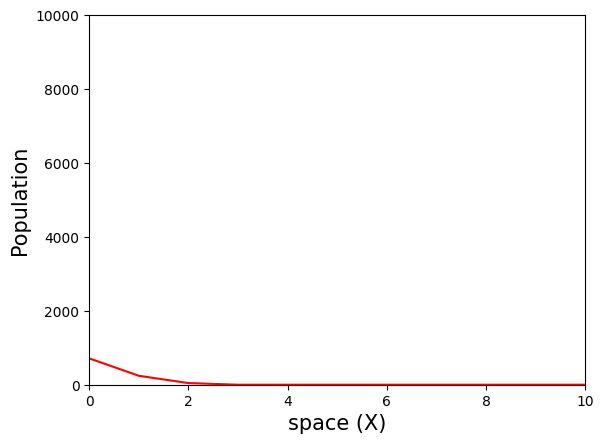

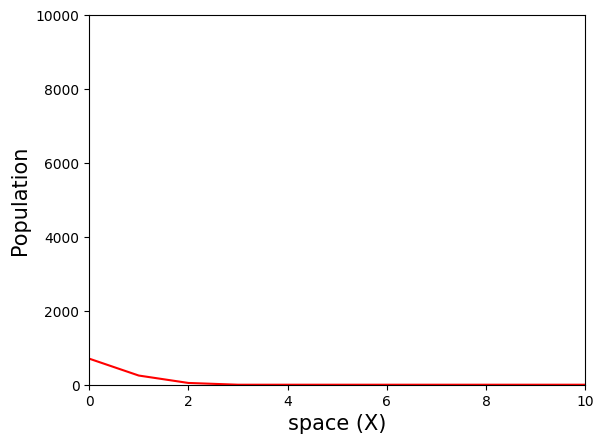

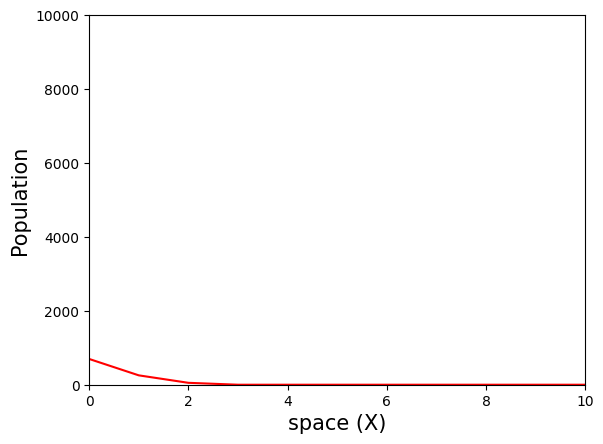

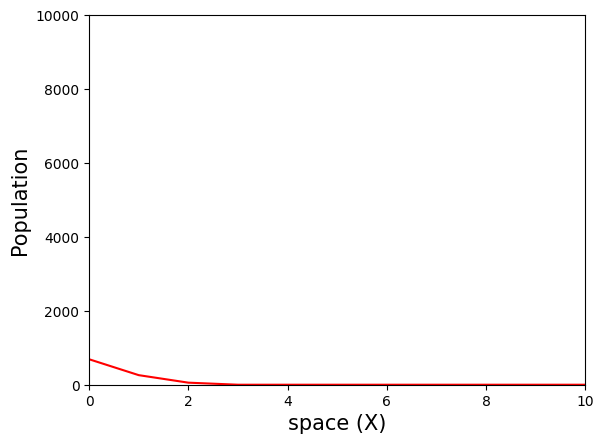

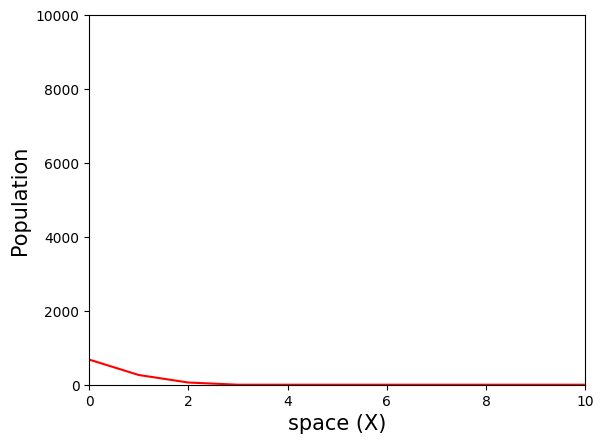

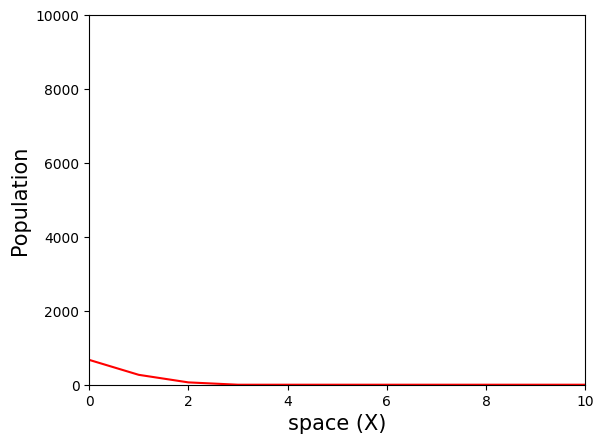

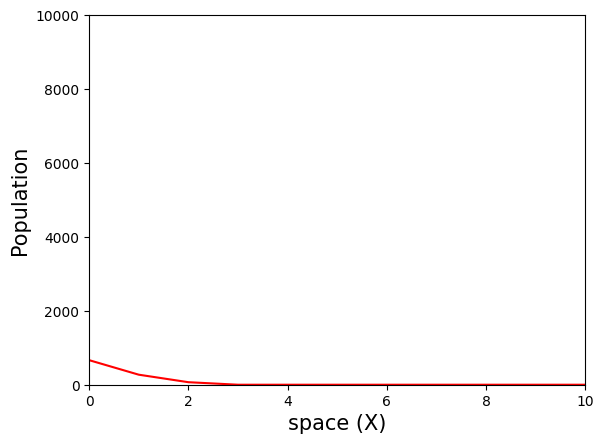

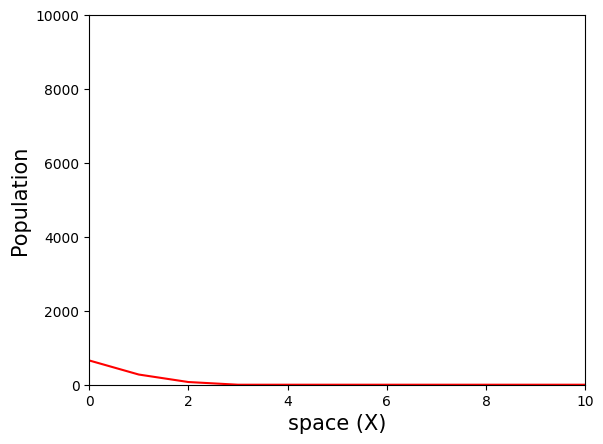

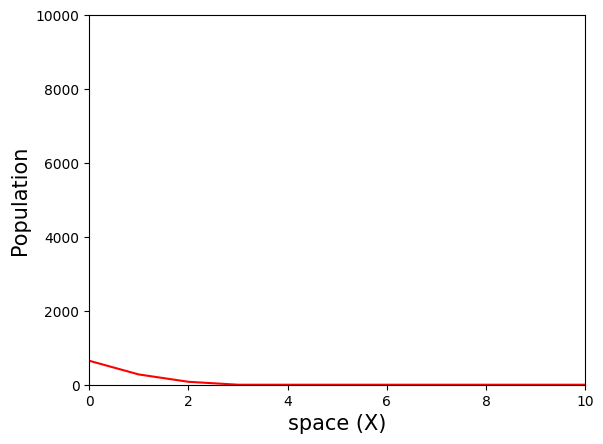

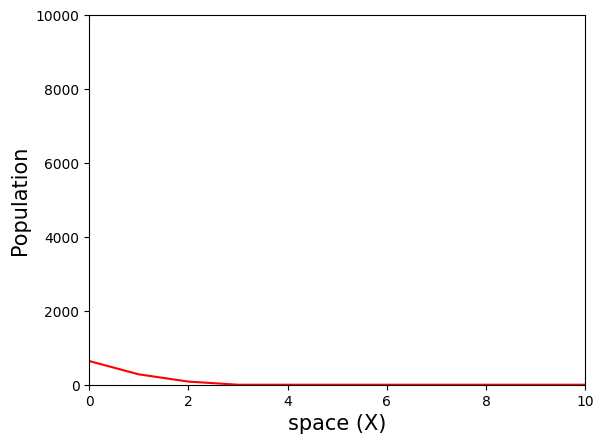

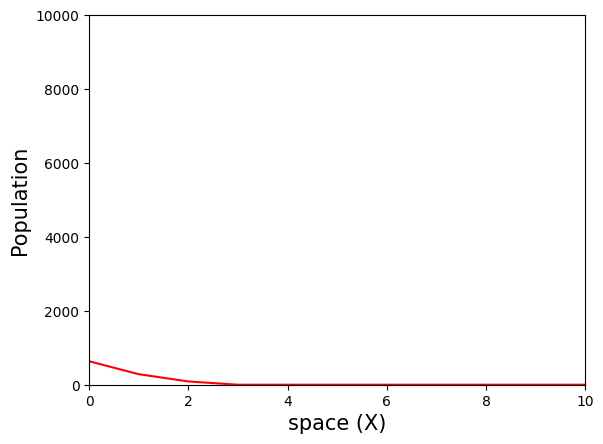

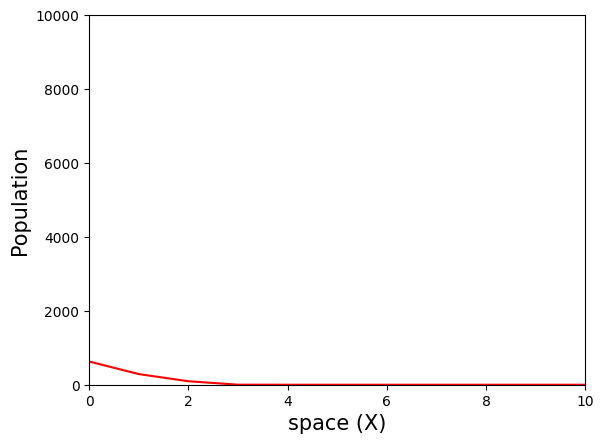

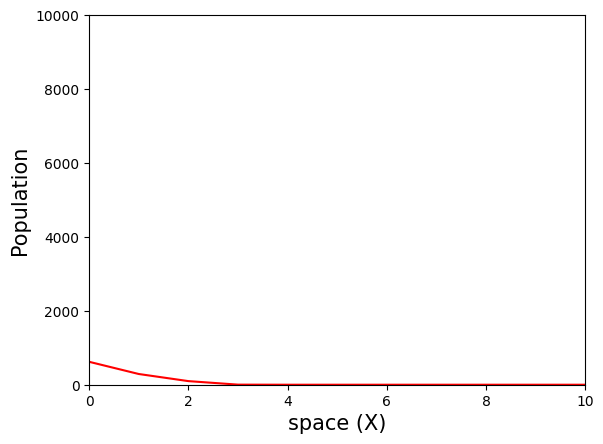

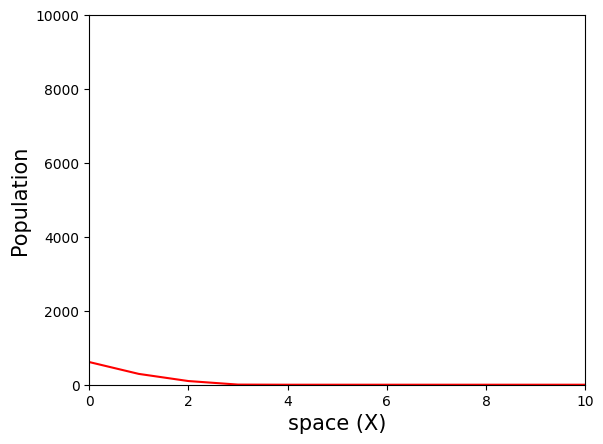

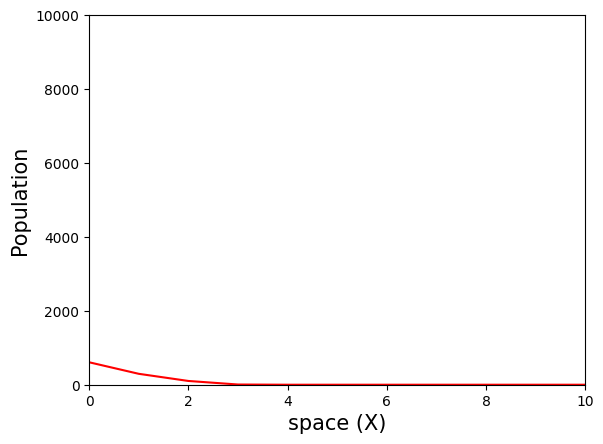

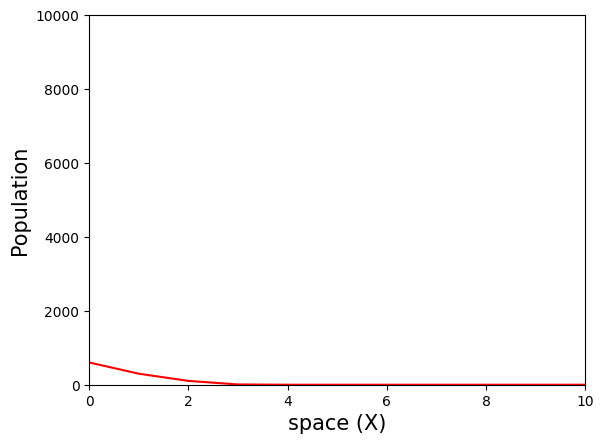

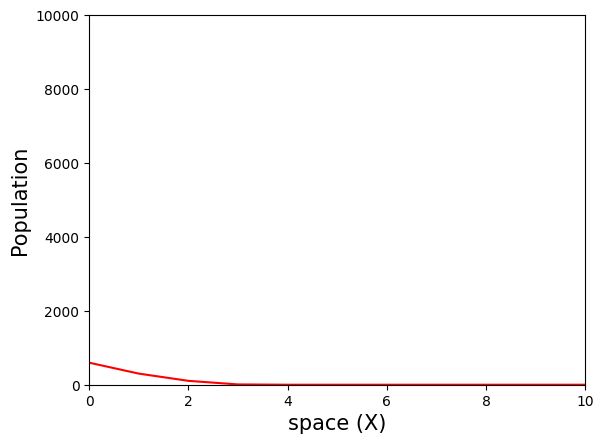

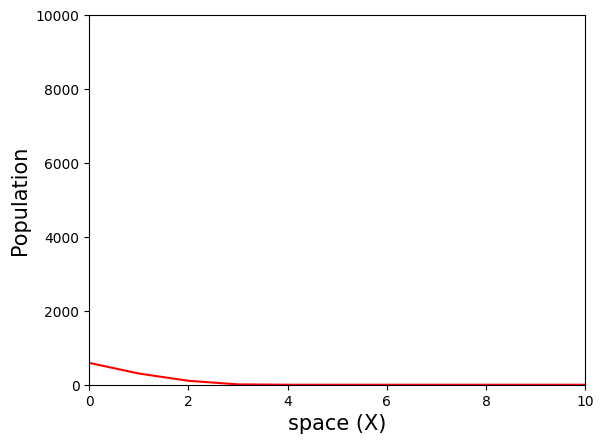

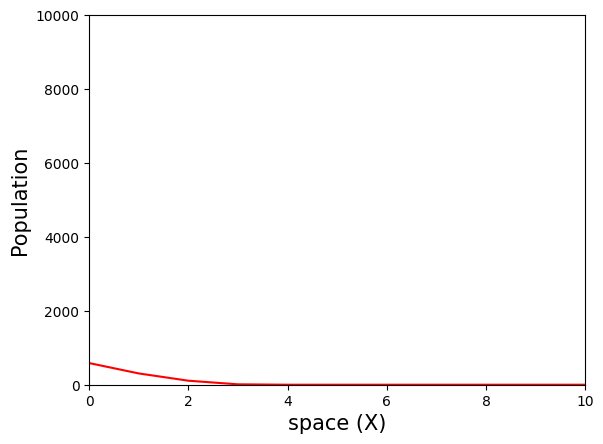

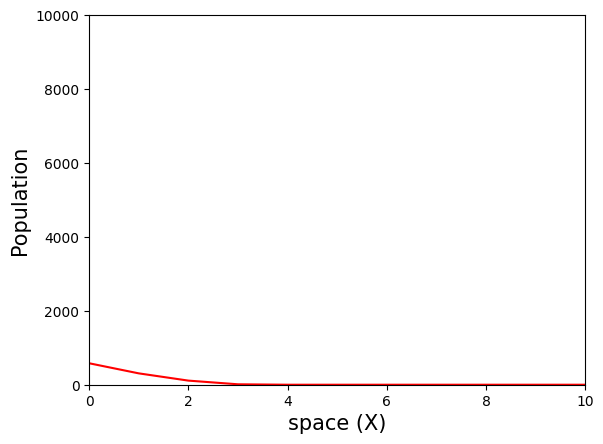

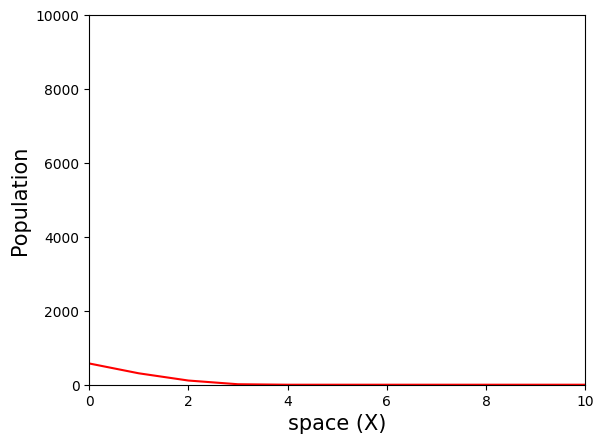

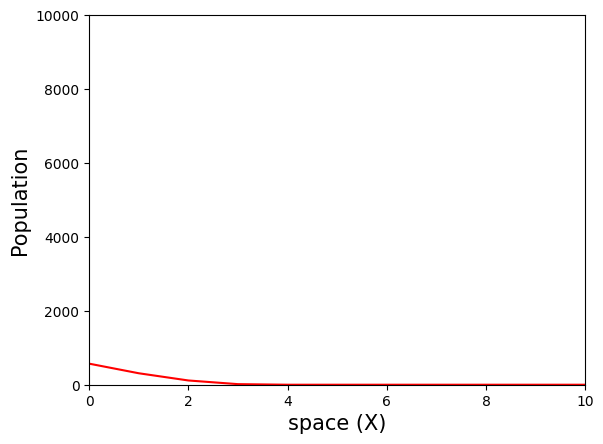

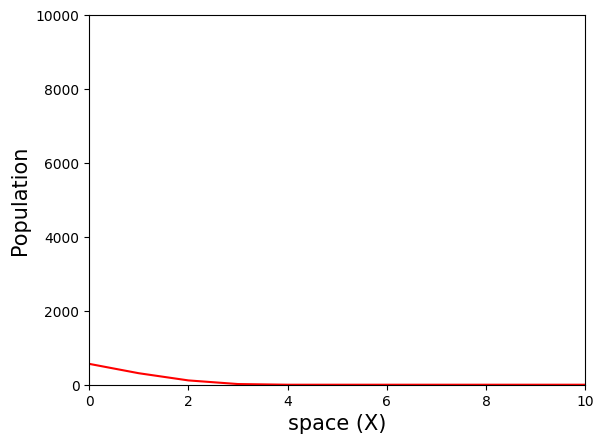

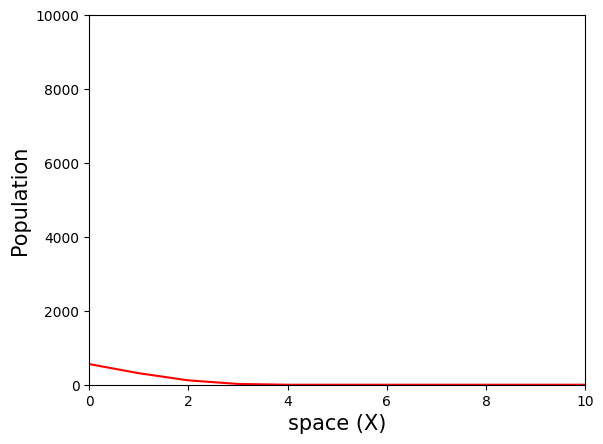

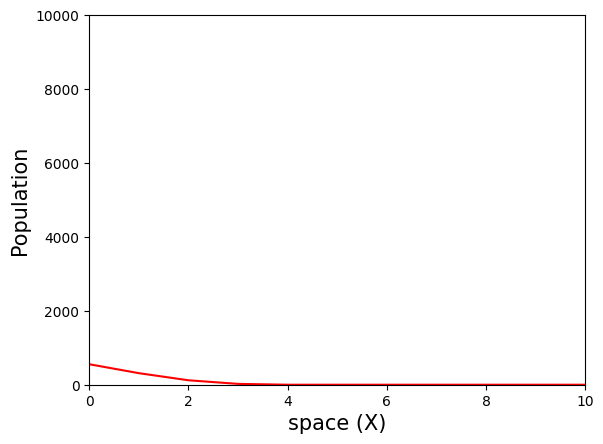

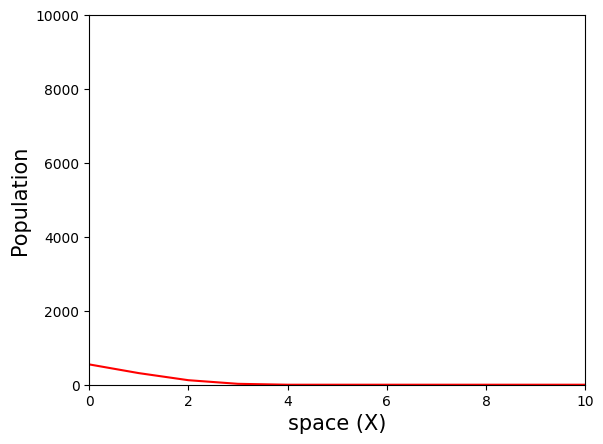

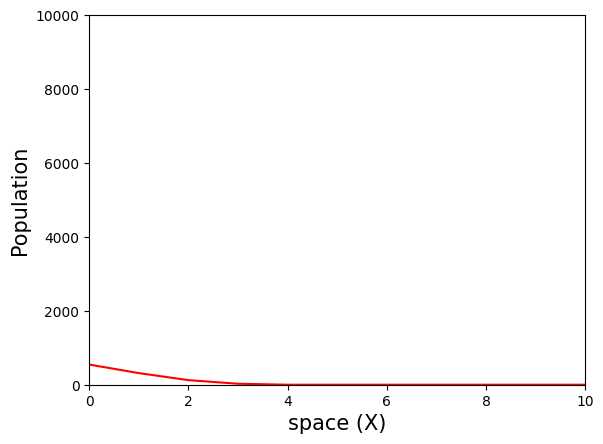

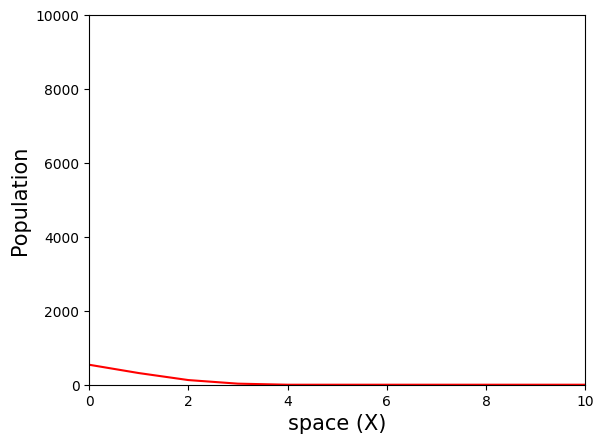

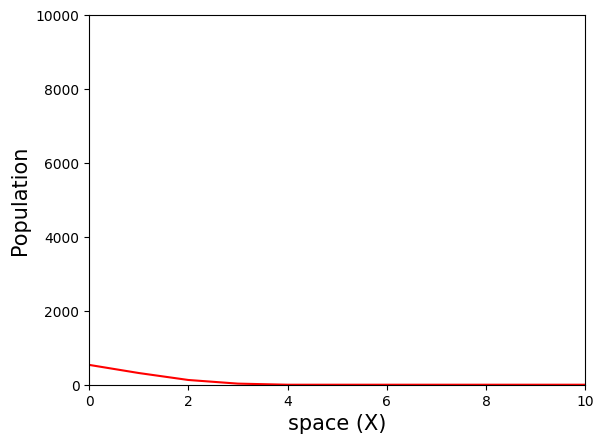

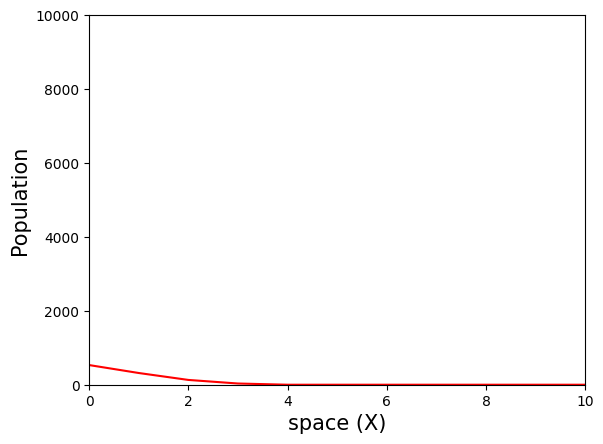

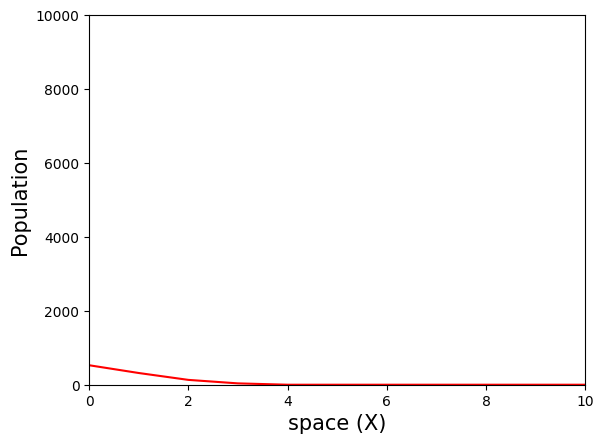

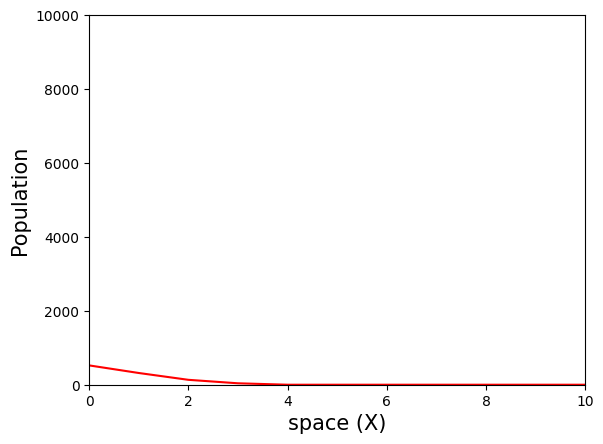

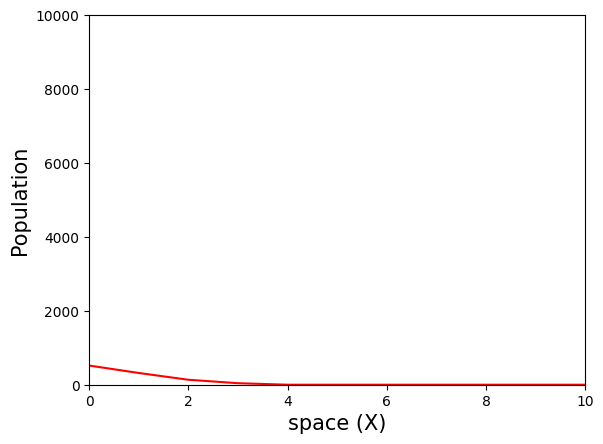

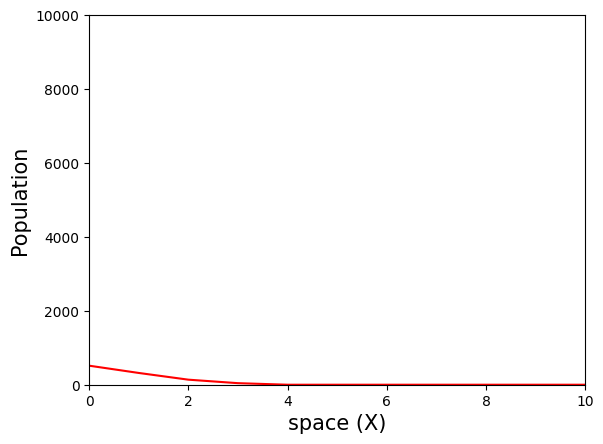

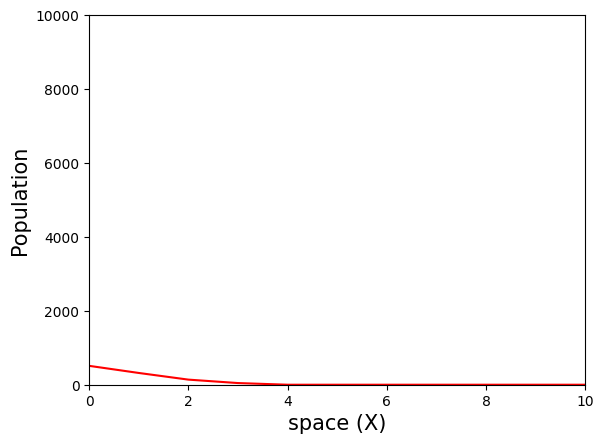

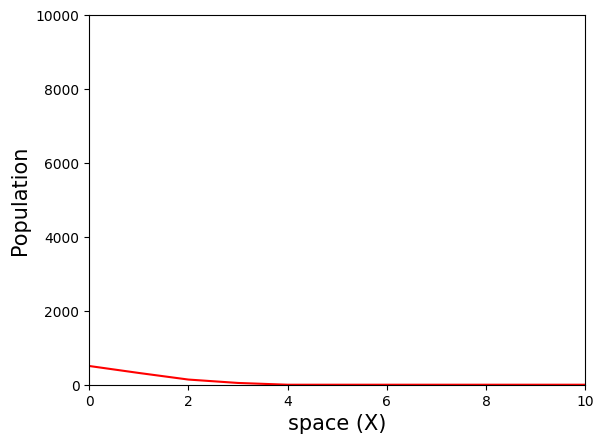

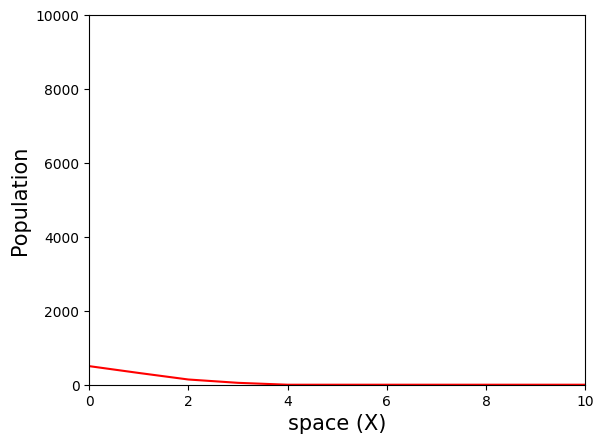

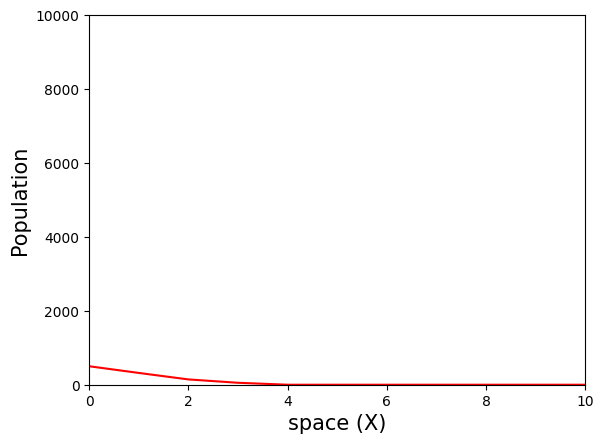

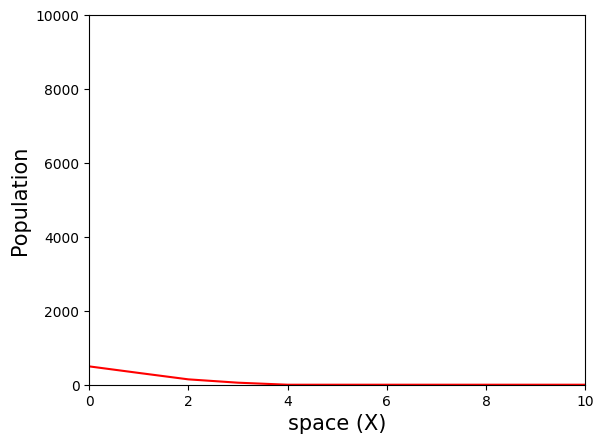

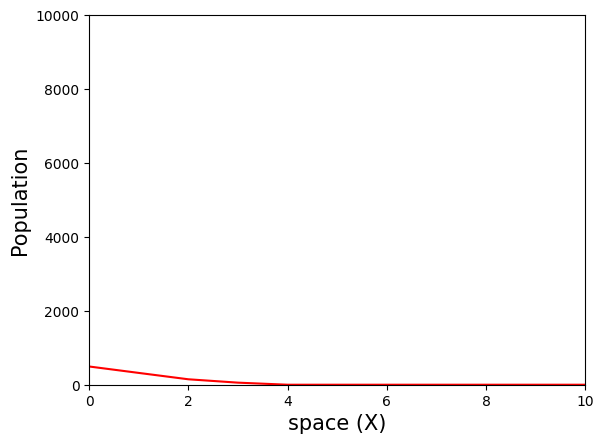

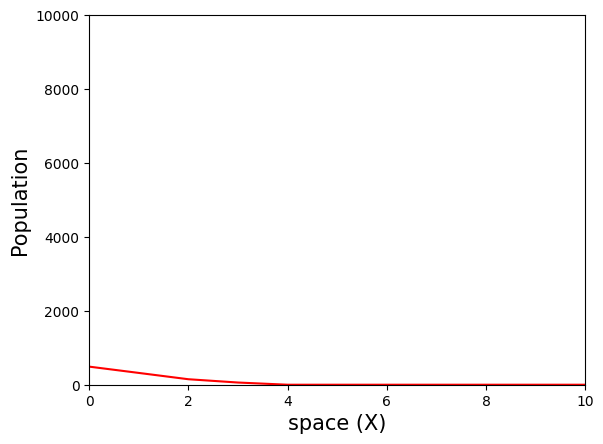

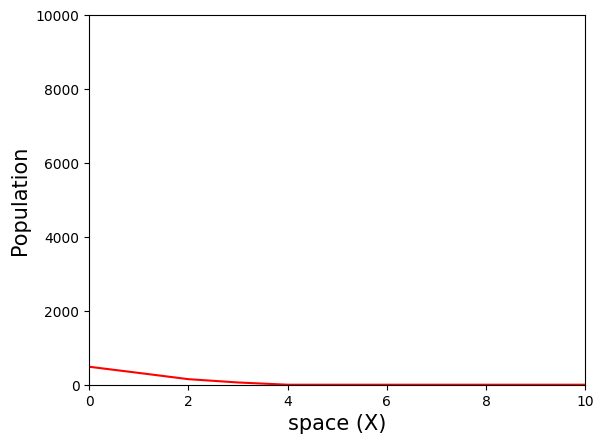

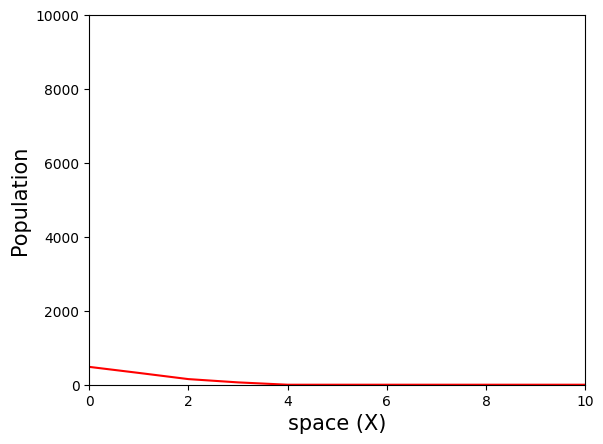

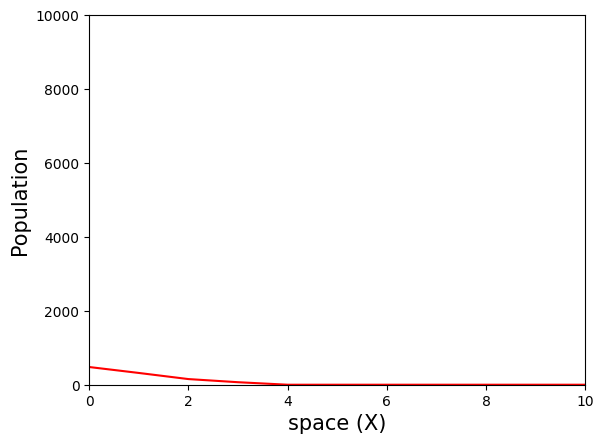

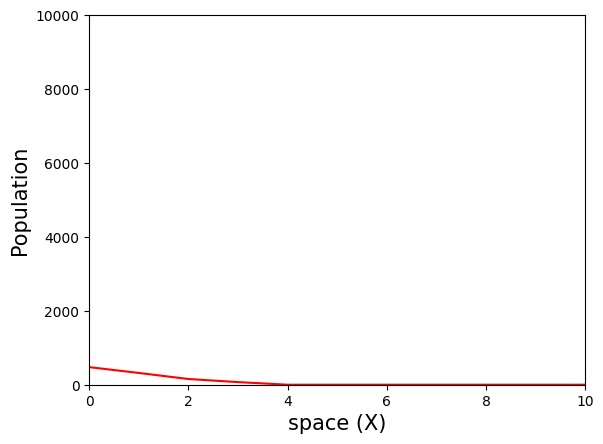

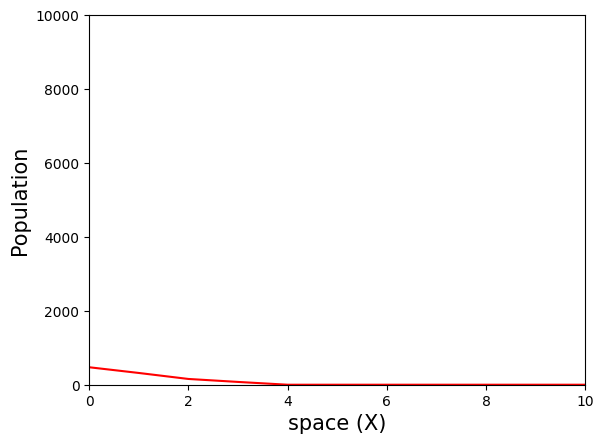

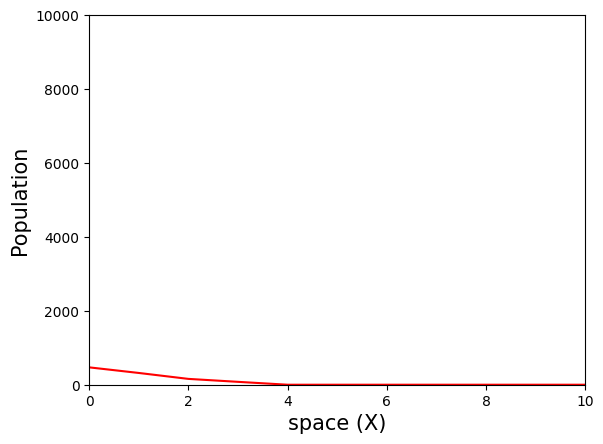

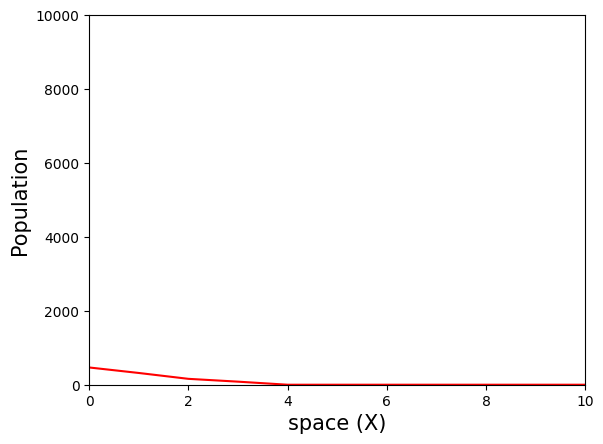

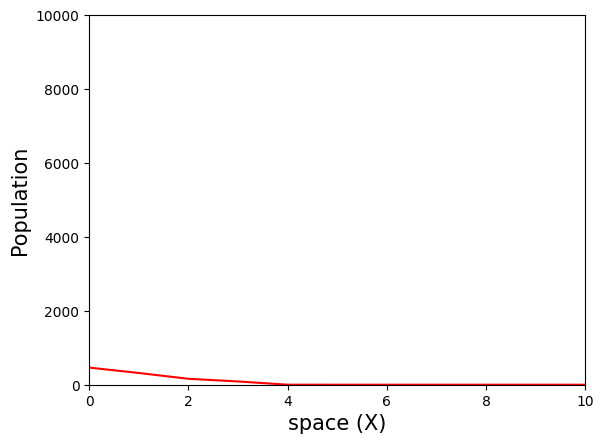

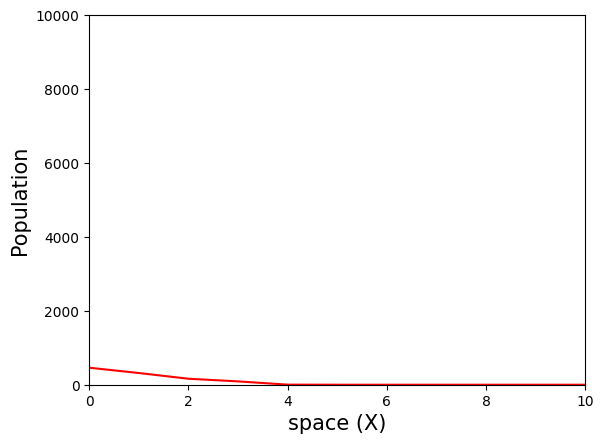

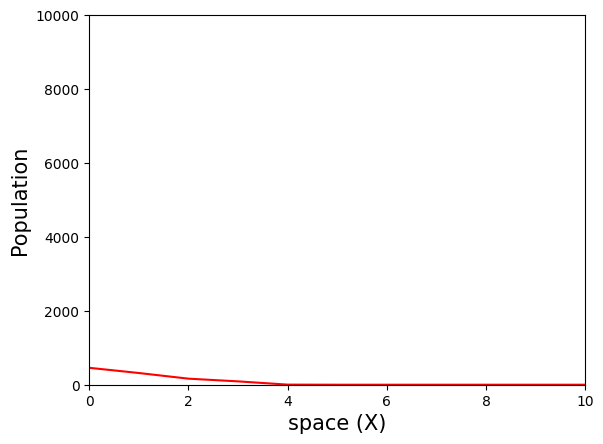

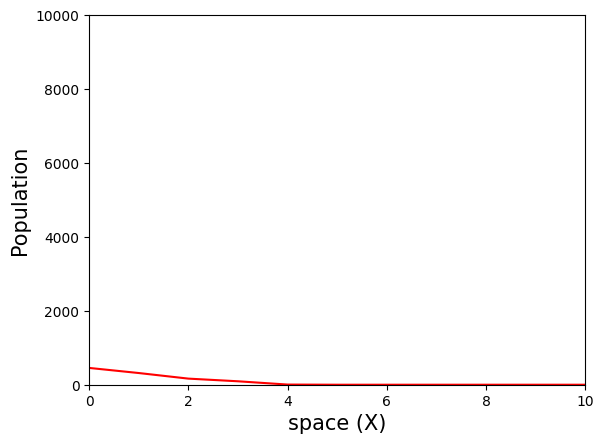

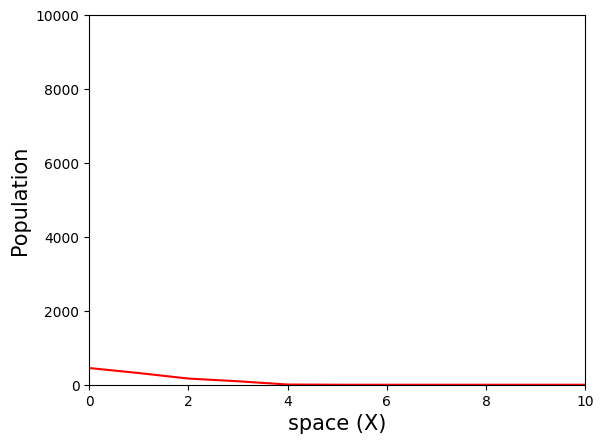

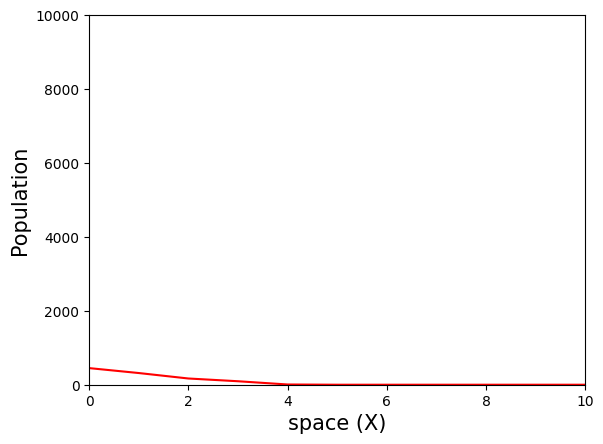

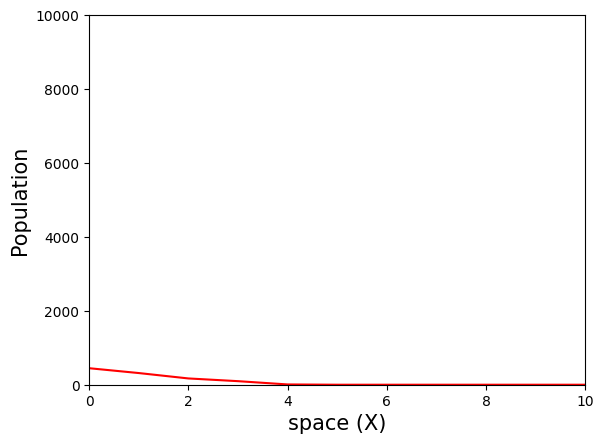

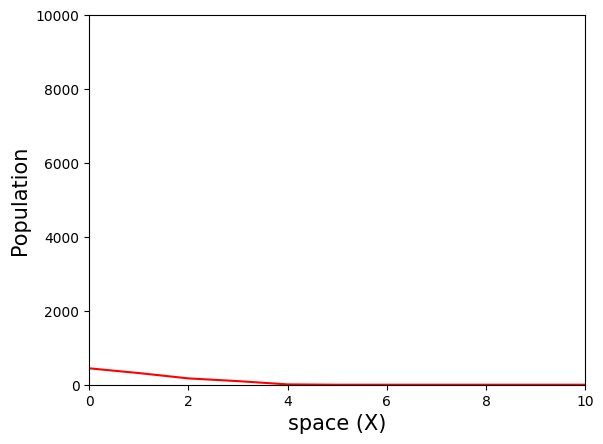

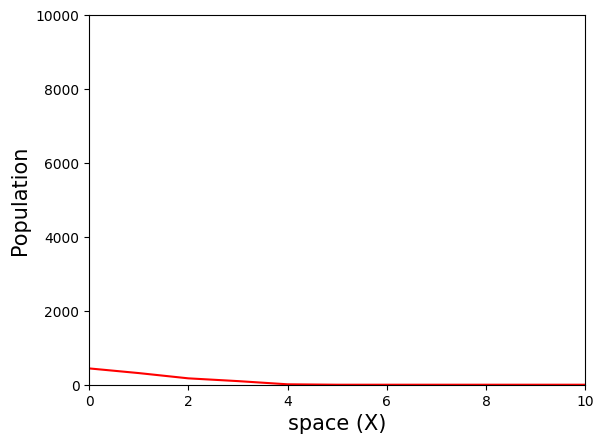

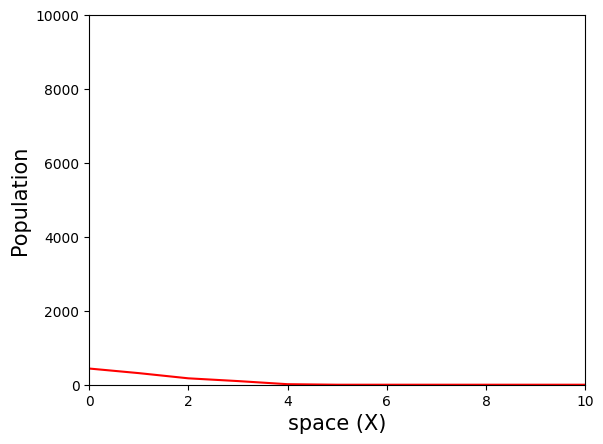

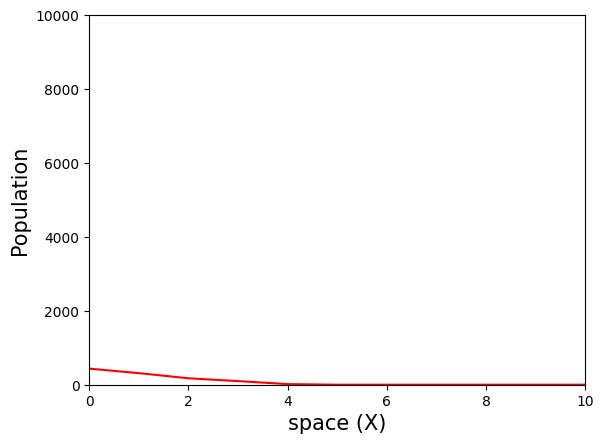

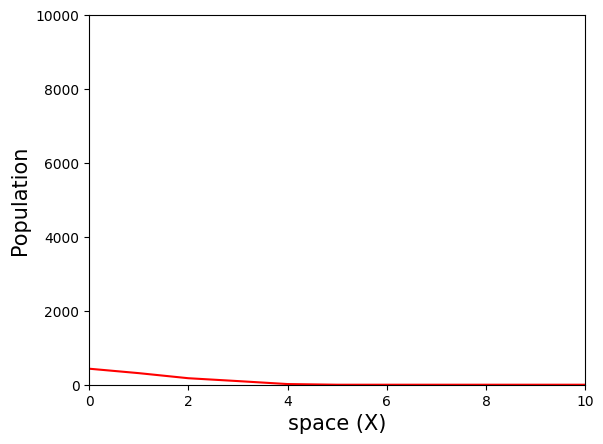

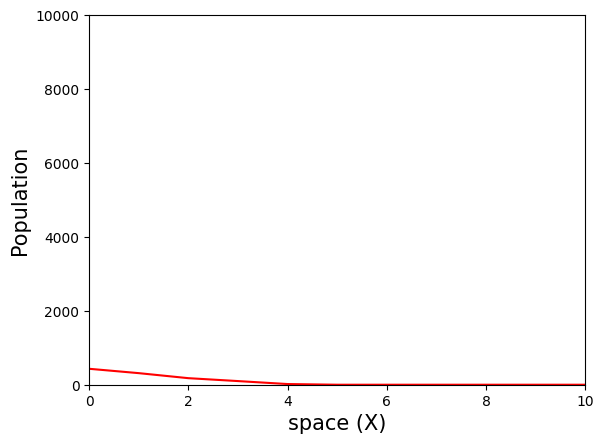

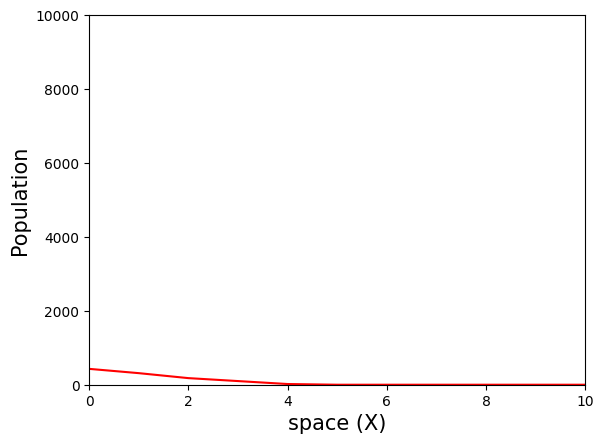

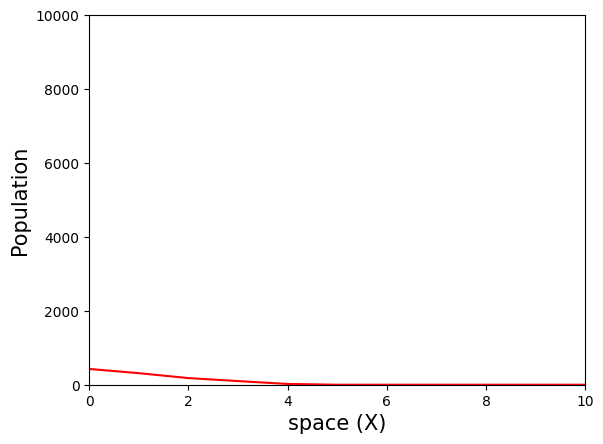

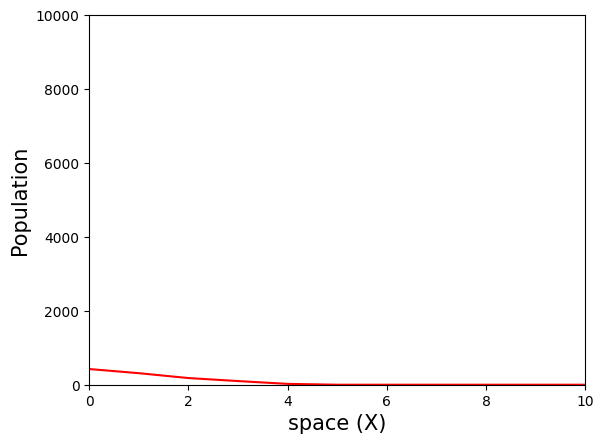

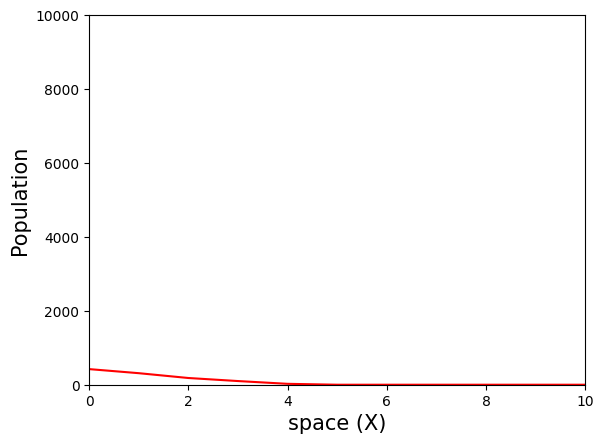

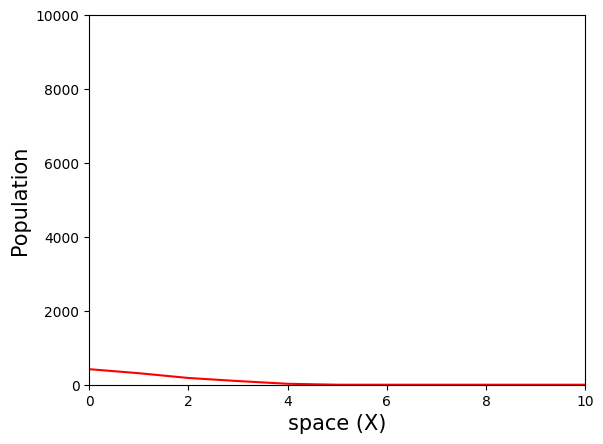

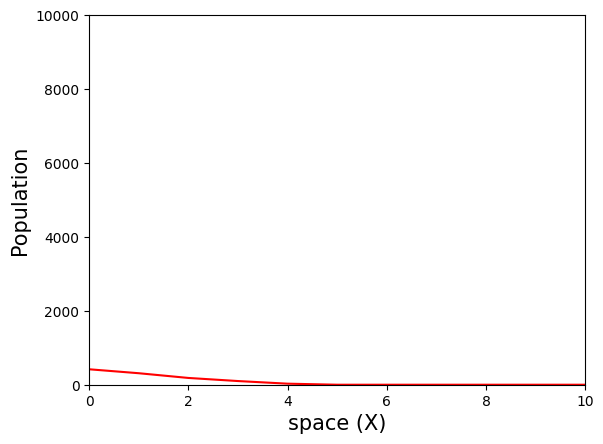

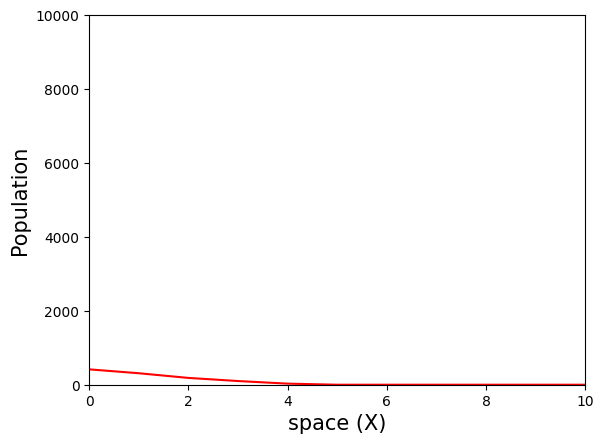

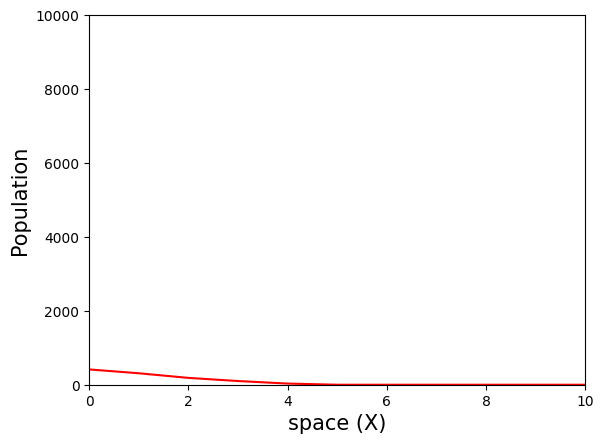

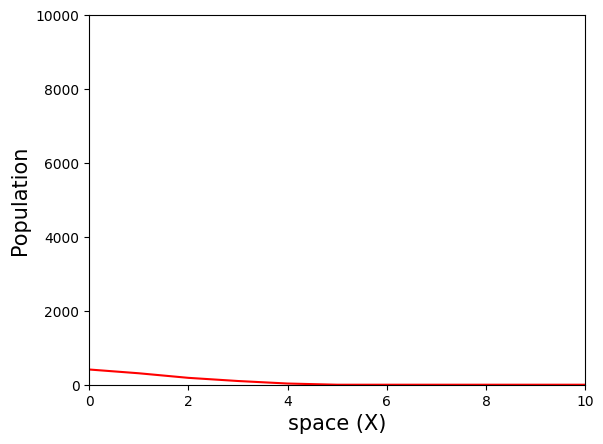

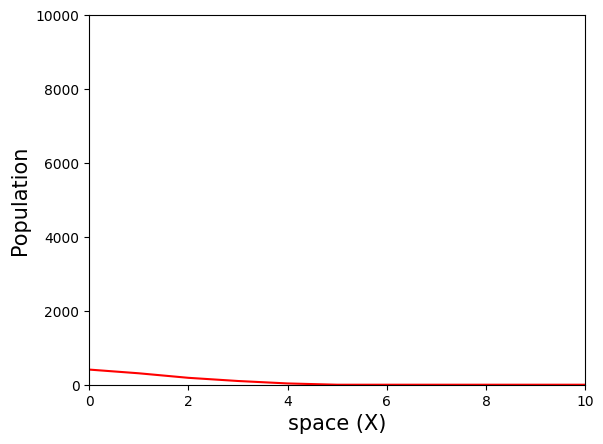

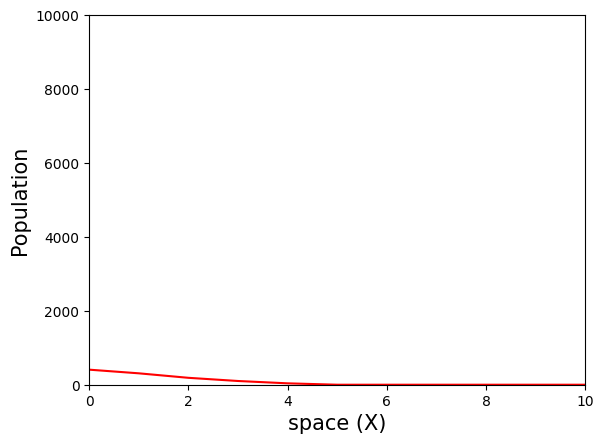

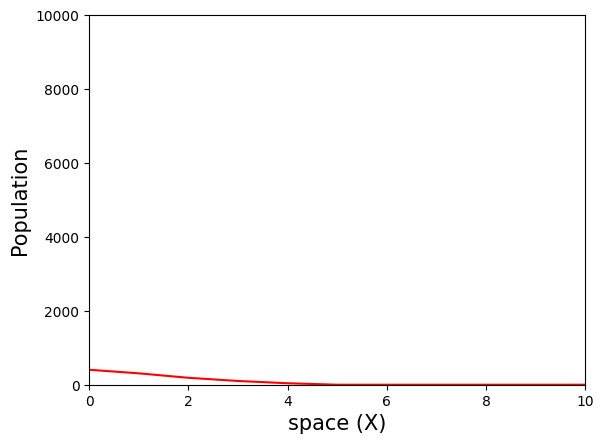

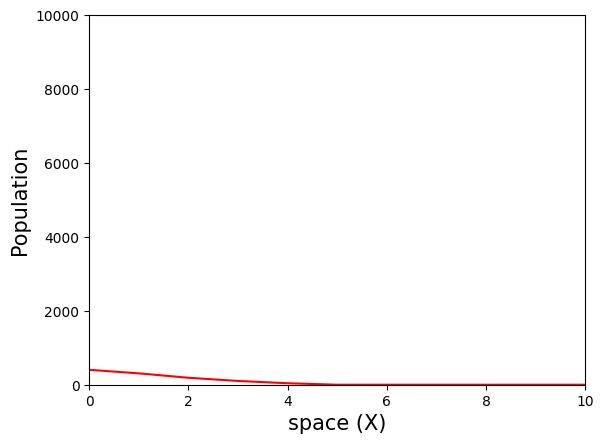

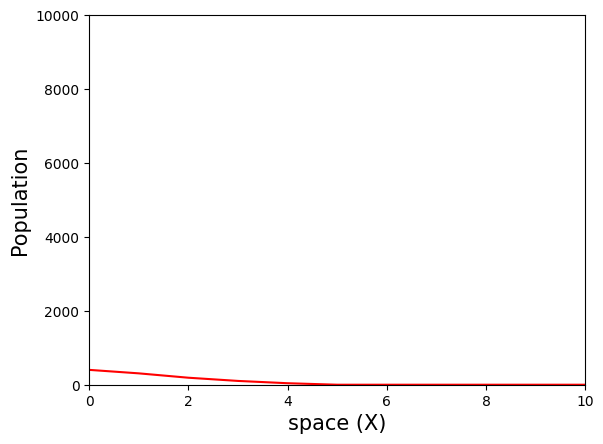

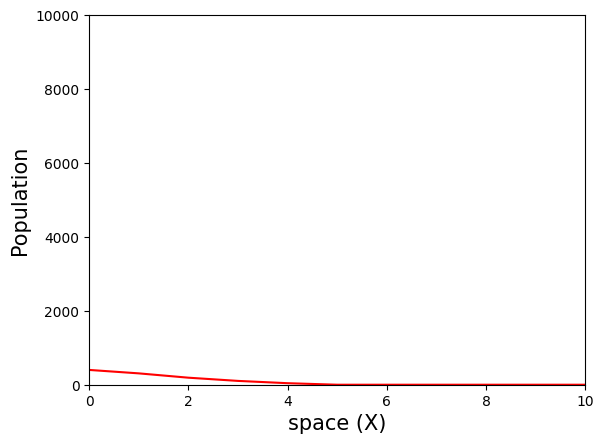

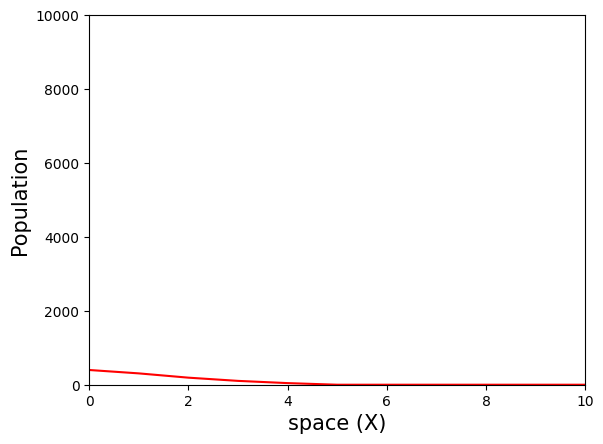

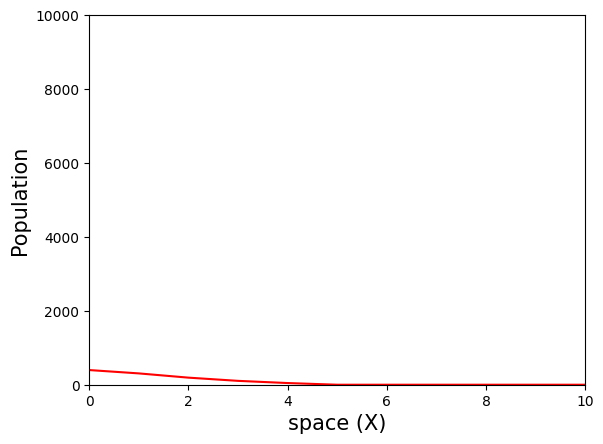

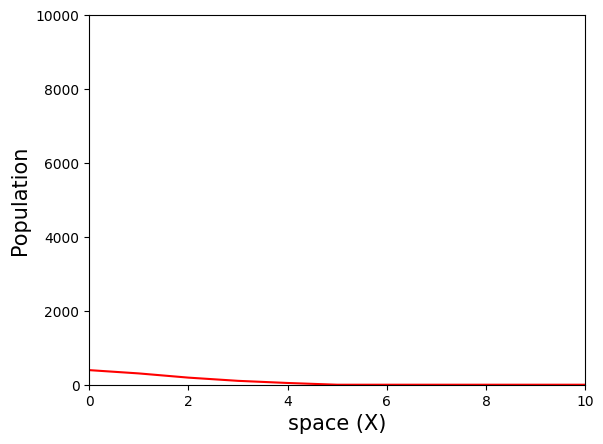

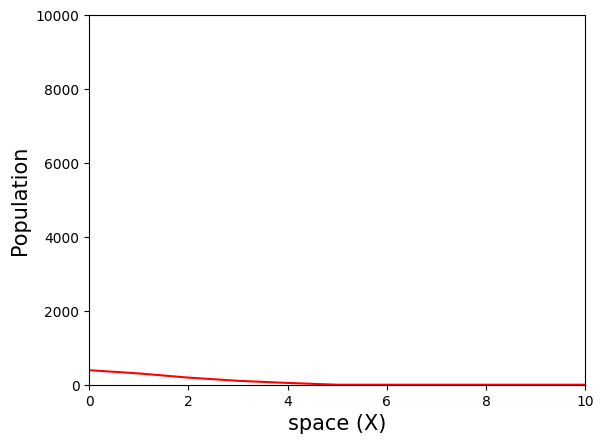

In [6]:
i=0
frames=[]
threshold=2000
"""Save images in a folder before video"""
outputdir="images"
if not os.path.exists(outputdir): # if the folder doesn't exist create it
    os.makedirs(outputdir)
for m in name:
#     print m
    fig=plt.figure()
    #sns.set_style("whitegrid")
    Pop_time=np.array(Pop_stoc6[m])
    x=np.array(range(0,len(Pop_time)))
    plt.plot(Pop_time,'r-')
    plt.xlabel('space (X)', fontsize=15)
    plt.ylabel(r'Population', fontsize=15)
    plt.xlim(0,10)
    plt.ylim(0,10000)
    #plt.show()
    i=i+1
    frame="images/image%03i.png" % i
    fig.savefig(frame,dpi=100)
    frames.append(frame)   
os.system("mencoder 'mf://images/image*.png' -mf type=png:fps=5 -ovc lavc -lavcopts vcodec=wmv2 -oac copy  -o " + "prueba2.mpg")        
#for frame in frames: os.remove(frame)

## Graphic with 2 regions deterministic and stochastic

In [7]:
i=0
frames=[]
threshold=2000
"""Save images in a folder before video"""
outputdir="images"
if not os.path.exists(outputdir): # if the folder doesn't exist create it
    os.makedirs(outputdir)
for m in name:
#     print m
    fig=plt.figure()
    #sns.set_style("whitegrid")
    Pop_time=np.array(Pop[m])
    x=np.array(range(0,len(Pop_time)))
    plt.plot(Pop_time,'r-')
    plt.plot(x[Pop_time>threshold],Pop_time[Pop_time>threshold],'r-',linewidth=3,label='Hybrid')
    plt.axvspan(0, max(x[Pop_time>threshold]), facecolor='#2fb300', alpha=0.25)
    plt.plot(x[Pop_time<threshold],Pop_time[Pop_time<threshold],'r-',linewidth=3)
    plt.axvspan(max(x[Pop_time>threshold]),200, facecolor='r', alpha=0.25)
#     plt.axvspan(max(x[Pop_time>threshold]),max(x[Pop_time>threshold])+1, facecolor='b', alpha=0.25)
    plt.plot(Pop_cg[m],'b--',linewidth=3, label=r'$n_{cg}$')
#    plt.plot(Pop_stoc6[m],'g-o', linewidth = 3, label = '$n$')
#     plt.title('$Hybrid$')
    #plt.legend('Time %s'%i)
    plt.xlabel('space (X)', fontsize=15)
    plt.ylabel(r'Population', fontsize=15)
    plt.xlim(0,200)
    plt.ylim(0,5000)
    plt.legend(loc='best')
    #plt.show()
    i=i+1
    frame="images/image%03i.png" % i
    fig.savefig(frame,dpi=100)
    frames.append(frame)   
os.system("mencoder 'mf://images/image*.png' -mf type=png:fps=5 -ovc lavc -lavcopts vcodec=wmv2 -oac copy  -o " + "prueba2.mpg")        
#for frame in frames: os.remove(frame)

NameError: name 'Pop' is not defined

<Figure size 640x480 with 0 Axes>

# Velocity (hybrid vs  cg)

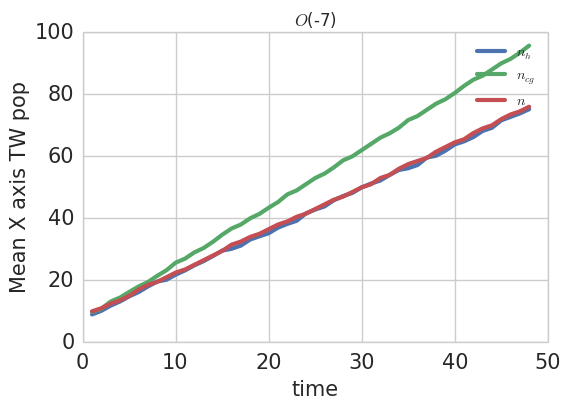

In [ ]:
import numpy as np

plt.figure()

nu=25000 #es 24000
Pop_haux_mean=[]
Pop_cgaux_mean=[]
Pop_staux_mean=[]

#for l in name[0::]:
for l in name[0:len(name)/2]:
    Pop_haux=np.array(Pop[l])
    Pop_haux_mean.append(np.mean(np.where((Pop_haux<Pop_haux[0]) & (Pop_haux>0.01))[0]))
    
    Pop_cgaux=np.array(Pop_cg[l])
    Pop_cgaux_mean.append(np.mean(np.where((Pop_cgaux<Pop_cgaux[0]) & (Pop_cgaux>0.01))[0]))
    
    Pop_staux=np.array(Pop_stoc6[l])
    Pop_staux_mean.append(np.mean(np.where((Pop_staux<(Pop_staux[0]-200)) & (Pop_staux>0.01))[0]))
    
plt.plot(Pop_haux_mean,'-',linewidth=3,label="$n_h$")
plt.plot(Pop_cgaux_mean,'-',linewidth=3,label="$n_{cg}$")
plt.plot(Pop_staux_mean,'-',linewidth=3,label="$n$")

w=range(100000,5000000,50000)

cgcg=Pop_cgaux_mean[1::]
stst=Pop_staux_mean[1::]
#print w
#print cgcg
#print stst
results = {}
#zz=np.polyfit(w,cgcg,1)
results['polynomial']=zz.tolist()
p = np.poly1d(zz)
# fit values, and mean
yhat = p(w)                         # or [p(z) for z in x]
ybar = np.sum(cgcg)/len(cgcg)          # or sum(y)/len(y)
ssreg = np.sum((yhat-ybar)**2)   # or sum([ (yihat - ybar)**2 for yihat in yhat])
sstot = np.sum((cgcg - ybar)**2)    # or sum([ (yi - ybar)**2 for yi in y])
results['determination'] = ssreg / sstot
#print results
#print zz

#zzz=np.polyfit(w,stst,1)
#print zzz


plt.title('$O$(-%s)'%(7))
# plt.legend([pop_mod, pop_sto], ['$P_{mod}$', '$P_{stoc}$'],frameon=True, fancybox=True, shadow=True,fontsize=15,loc=0)

# plt.xlim(10,100)
# plt.ylim(0,150)
#plt.xticks(range(0,100,100/5),range(0,5500000/nu,5000000/(5*nu)), fontsize = 15) # work on current fig
plt.legend()
plt.yticks( fontsize = 15) # work on current fig
plt.xticks( fontsize = 15)
plt.xlabel('time', fontsize=15)
plt.ylabel(r'Mean X axis TW pop', fontsize=15)
plt.savefig('mean_position_TW_h_cg2.eps', dpi=100, bbox_inches='tight')
    

NameError: name 'pop_sto' is not defined

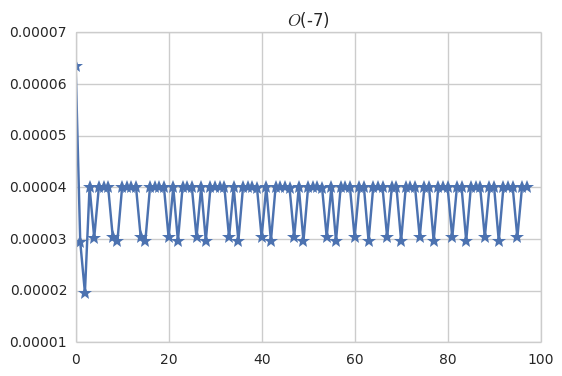

In [ ]:
#Same time snapshot of Population comparation between stocastic pop (n) and modify simplification (n_cg) 
%matplotlib inline
i=6
plt.figure()
sns.set_style("whitegrid")
velonew=[]
velocity_st6=[]

t_step = 50000

aux=1
for i in range(0,len(name)-aux):
    l=name[i]
    m=name[i+aux] 
    
    Pop_maux6_1=np.array(Pop_cg[l])
    Pop_maux6_2=np.array(Pop_cg[m])
    
    flag1=np.min([np.max(Pop_maux6_2), np.max(Pop_maux6_1)])
    flag2=0
    flag=2000#(flag1-flag2)/2
    y1=np.max(Pop_maux6_1[(Pop_maux6_1==flag2)])  
    y2=np.min(Pop_maux6_1[(Pop_maux6_1>=flag1)]) 
    y1_=np.max(Pop_maux6_2[(Pop_maux6_2==flag2)])  
    y2_=np.min(Pop_maux6_2[(Pop_maux6_2>=flag1)]) 
    x1 = np.min(np.where((Pop_maux6_1==flag2)))
    x2 = np.max(np.where((Pop_maux6_1>=flag1)))
    x1_= np.min(np.where((Pop_maux6_2==flag2)))  
    x2_= np.max(np.where((Pop_maux6_2>=flag1))) 
    ct= (y2*x1-y1*x2)/(x1-x2)
    mt=(y1-y2)/(x1-x2)
    ct1= (y2_*x1_-y1_*x2_)/(x1_-x2_)
    mt1=(y1_-y2_)/(x1_-x2_)
    xt= (flag- ct)/mt 
    xt1= (flag- ct1)/mt1
    
    vel_cg= (xt1-xt)/(t_step*aux)
    
    
    Pop_staux6_1=np.array(Pop[l])
    Pop_staux6_2=np.array(Pop[m])

    flag1=np.min([np.max(Pop_staux6_2), np.max(Pop_staux6_1)])
    flag2=0
    flag=2000#(flag1-flag2)/2
    y1=np.max(Pop_maux6_1[(Pop_staux6_1==flag2)])  
    y2=np.min(Pop_maux6_1[(Pop_staux6_1>=flag1)]) 
    y1_=np.max(Pop_maux6_2[(Pop_staux6_2==flag2)])  
    y2_=np.min(Pop_maux6_2[(Pop_staux6_2>=flag1)]) 
    x1 = np.min(np.where((Pop_staux6_1==flag2)))
    x2 = np.max(np.where((Pop_staux6_1>=flag1)))
    x1_= np.min(np.where((Pop_staux6_2==flag2)))  
    x2_= np.max(np.where((Pop_staux6_2>=flag1))) 
    ct= (y2*x1-y1*x2)/(x1-x2)
    mt=(y1-y2)/(x1-x2)
    ct1= (y2_*x1_-y1_*x2_)/(x1_-x2_)
    mt1=(y1_-y2_)/(x1_-x2_)
    xt= (flag- ct)/mt 
    xt1= (flag- ct1)/mt1
    
    vel_st= abs(xt1-xt)/(t_step*aux)
    
    
    velonew.append(vel_cg)
    velocity_st6.append(vel_st)
    

pop_cg,=plt.plot(velonew,'*-',ms=10)   
# pop_sto,=plt.plot(velocity_st6,'o-',linewidth=3,alpha=0.7)

plt.title('$O$(-%s)'%(7))
plt.legend([pop_sto, pop_cg],['n','$n_{cg}$'])

# plt.xticks(range(0,(100-aux)+1,(100-aux)/5),range(0,500000+1,500000/5), fontsize = 15) # work on current fig
plt.yticks( fontsize = 15) # work on current fig
plt.xticks( fontsize = 15)
plt.xlabel('t', fontsize=15)
plt.ylabel(r'TW Velocity', fontsize=15)
plt.tight_layout()
plt.savefig('Velocity_TW_ng_st.pdf')

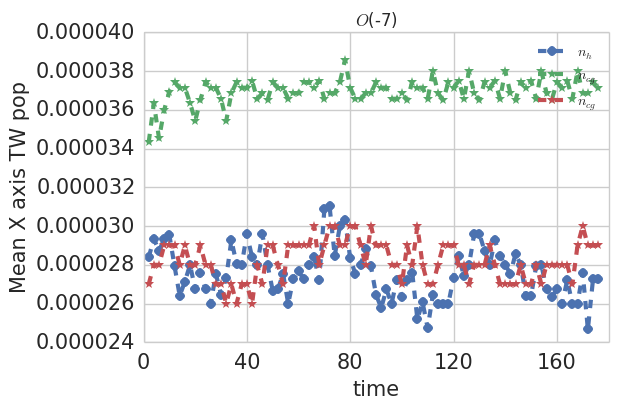

In [ ]:
plt.figure()


vel_h = []
vel_cg = []
vel_st =[]

t_step = 50000
nu=25000 #1/deathrate (en verdad es 24000)
aux=10
for i in range(0,len(name)-aux):
    l=name[i]
    m=name[i+aux] 
    
    Pop_haux=np.array(Pop[l])
    Pop_haux_mean = (np.mean(np.where((Pop_haux<Pop_haux[0]) & (Pop_haux>0.01))[0]))
    
    Pop_cgaux=np.array(Pop_cg[l])
    Pop_cgaux_mean = (np.mean(np.where((Pop_cgaux<Pop_cgaux[0]) & (Pop_cgaux>0.01))[0]))
    
    Pop_staux=np.array(Pop_stoc6[l])
    Pop_staux_mean = (np.mean(np.where((Pop_staux<(Pop_staux[0]-200)) & (Pop_staux>0.01))[0]))
    
    Pop_haux=np.array(Pop[m])
    Pop_haux_mean_next = (np.mean(np.where((Pop_haux<Pop_haux[0]) & (Pop_haux>0.01))[0]))
    
    Pop_cgaux=np.array(Pop_cg[m])
    Pop_cgaux_mean_next = (np.mean(np.where((Pop_cgaux<Pop_cgaux[0]) & (Pop_cgaux>0.01))[0]))
    
    Pop_staux=np.array(Pop_stoc6[m])
    Pop_staux_mean_next = (np.mean(np.where((Pop_staux<(Pop_staux[0]-200)) & (Pop_staux>0.01))[0]))
        
    vel_h.append(np.array(Pop_haux_mean_next-Pop_haux_mean)/(aux*t_step))
    vel_cg.append((Pop_cgaux_mean_next-Pop_cgaux_mean)/(aux*t_step))
    vel_st.append(np.array(Pop_staux_mean_next-Pop_staux_mean)/(aux*t_step))
    
plt.plot(vel_h,'o--',linewidth=3,label="$n_h$")
plt.plot(vel_cg,'*--',linewidth=3,label="$n_{cg}$")
plt.plot(vel_st,'*--',linewidth=3,label="$n_{cg}$")

plt.title('$O$(-%s)'%(7))
# plt.legend([pop_mod, pop_sto], ['$P_{mod}$', '$P_{stoc}$'],frameon=True, fancybox=True, shadow=True,fontsize=15,loc=0)

# plt.xlim(10,100)
# plt.ylim(0,150)
plt.xticks(range(0,100,100/5),range(0,5500000/nu,5000000/(nu*5)), fontsize = 15) # work on current fig
plt.legend()
plt.yticks( fontsize = 15) # work on current fig
plt.xticks( fontsize = 15)
plt.xlabel('time', fontsize=15)
plt.ylabel(r'Mean X axis TW pop', fontsize=15)
plt.savefig('mean_position_TW_h_cg.eps', dpi=100, bbox_inches='tight')

In [ ]:
plt.figure()


vel_h = []
vel_cg = []

error_h_cg = []

t_step = 50000
nu=25000 #1/deathrate (en verdad es 24000)
aux=10
for i in range(0,len(name)-aux):
    l=name[i]
    m=name[i+aux] 
    
    Pop_haux=np.array(Pop[l])
    Pop_haux_mean = (np.mean(np.where((Pop_haux<Pop_haux[0]) & (Pop_haux>0.01))[0]))
    
    Pop_cgaux=np.array(Pop_cg[l])
    Pop_cgaux_mean = (np.mean(np.where((Pop_cgaux<Pop_cgaux[0]) & (Pop_cgaux>0.01))[0]))
    
    Pop_haux=np.array(Pop[m])
    Pop_haux_mean_next = (np.mean(np.where((Pop_haux<Pop_haux[0]) & (Pop_haux>0.01))[0]))
    
    Pop_cgaux=np.array(Pop_cg[m])
    Pop_cgaux_mean_next = (np.mean(np.where((Pop_cgaux<Pop_cgaux[0]) & (Pop_cgaux>0.01))[0]))
        
    vel_h.append(np.array(Pop_haux_mean_next-Pop_haux_mean)/(aux*t_step))
    vel_cg.append((Pop_cgaux_mean_next-Pop_cgaux_mean)/(aux*t_step))
    
    error_h_cg.append(-((Pop_haux_mean_next-Pop_haux_mean)-(Pop_cgaux_mean_next-Pop_cgaux_mean))/(aux*t_step))
    
    
plt.plot(error_h_cg,'o--',linewidth=3,label="$n_h$")
# plt.plot(vel_cg,'*--',linewidth=3,label="$n_{cg}$")


plt.title('$O$(-%s)'%(7))
# plt.legend([pop_mod, pop_sto], ['$P_{mod}$', '$P_{stoc}$'],frameon=True, fancybox=True, shadow=True,fontsize=15,loc=0)

# plt.xlim(10,100)
# plt.ylim(0,150)
plt.xticks(range(0,100,100/5),range(0,5500000/nu,5000000/(nu*5)), fontsize = 15) # work on current fig
# plt.legend()
plt.yticks( fontsize = 15) # work on current fig
plt.xticks( fontsize = 15)
plt.xlabel('time', fontsize=15)
plt.ylabel(r'$|v_{cg}-v_{h}|$', fontsize=15)
plt.savefig('velocity_error_h_cg.eps', dpi=100, bbox_inches='tight')